# **Problem 1**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Colab works/practice/dog image.jpeg')

In [ ]:
sharp_kernel = np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]])

In [ ]:
img_sharp = cv2.filter2D(img,-1,sharp_kernel)

In [ ]:
stack = np.hstack((img,img_sharp))

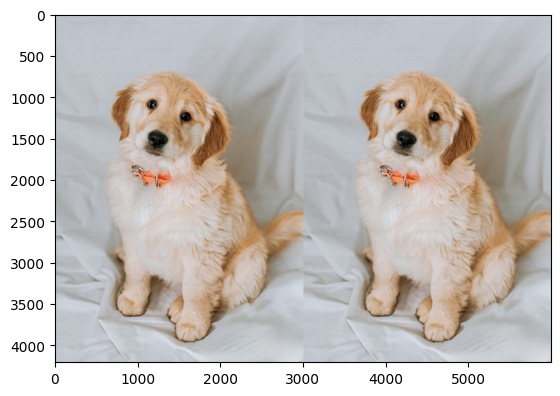

In [ ]:
plt.imshow(cv2.cvtColor(stack,cv2.COLOR_BGR2RGB))

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

In [ ]:
sobel_vertical = cv2.convertScaleAbs(sobel_vertical)
sobel_horizontal = cv2.convertScaleAbs(sobel_horizontal)

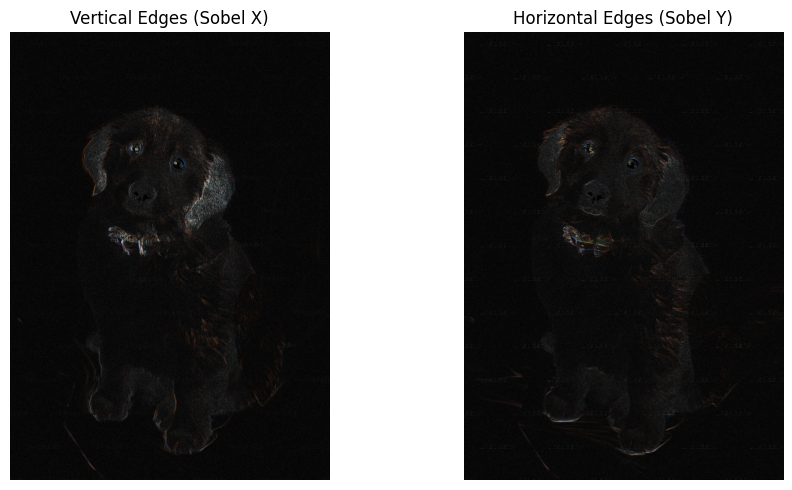

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Vertical Edges (Sobel X)')
plt.imshow(sobel_vertical, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Horizontal Edges (Sobel Y)')
plt.imshow(sobel_horizontal, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# **Problem 2**

In [ ]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

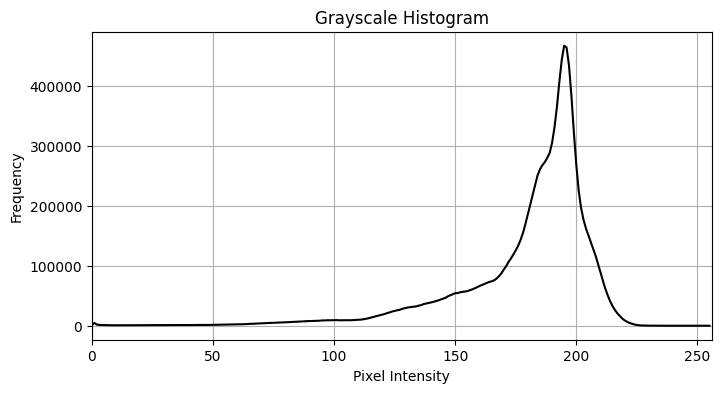

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

In [ ]:
equalized_img = cv2.equalizeHist(img_gray)

(np.float64(-0.5), np.float64(2999.5), np.float64(4205.5), np.float64(-0.5))

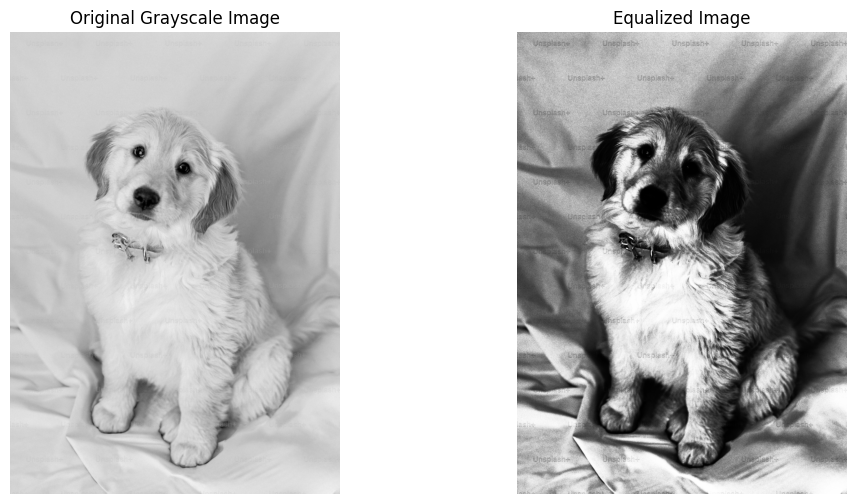

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')


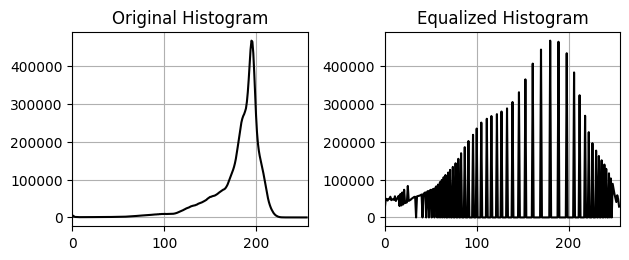

In [ ]:
equalized_hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

plt.subplot(2, 2, 3)
plt.title('Original Histogram')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)

plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.plot(equalized_hist, color='black')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

# **Problem 3**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Colab works/practice/dog image.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
blur_img = cv2.GaussianBlur(img_gray,(5,5),0)
edges_img = cv2.Canny(blur_img, 40, 120)

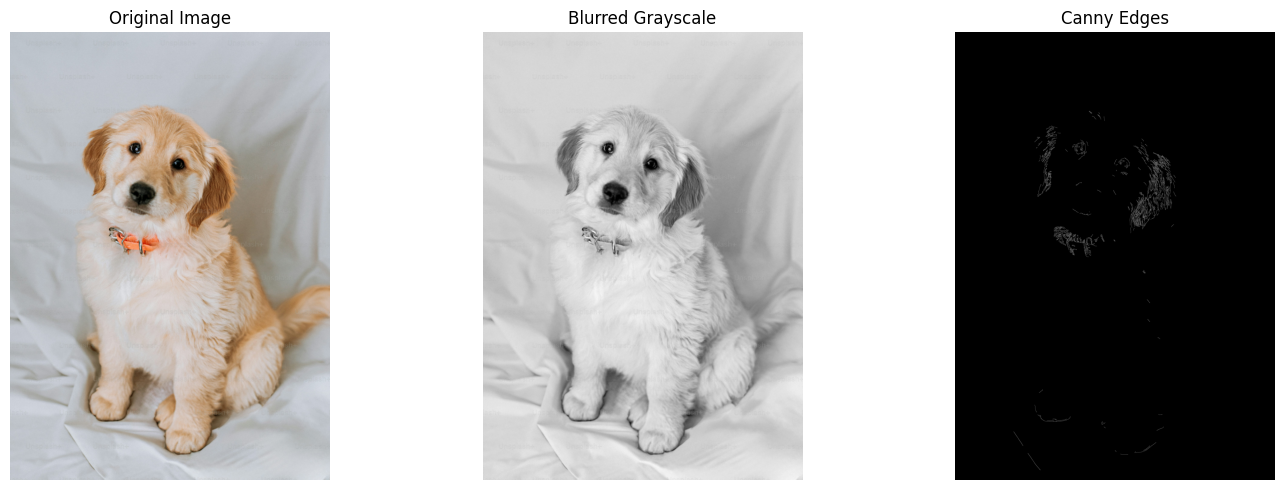

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Grayscale')
plt.imshow(blur_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edges')
plt.imshow(edges_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Problem 4**

In [ ]:
threshold = 200
bright_pixels = np.where(img_gray > threshold)
bright_count = len(bright_pixels[0])

Number of bright pixels > 200: 1848678


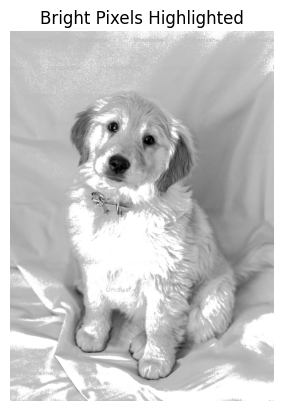

In [ ]:
highlighted = img_gray

for y, x in zip(*bright_pixels):
    cv2.circle(highlighted, (x, y), radius=1, color=(255, 255, 255), thickness=-1)

print(f"Number of bright pixels > {threshold}: {bright_count}")
plt.imshow(highlighted, cmap='gray')
plt.title("Bright Pixels Highlighted")
plt.axis('off')
plt.show()

In [ ]:
boxes = [
    (668, 671, 2067, 1789),   # Dog's face
    (814, 3019, 1938, 3980)   # Dog's tail
]

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for idx, (x1, y1, x2, y2) in enumerate(boxes):
    label = f'Object {idx + 1}'

    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=4)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 3.0
    font_thickness = 5

    (text_w, text_h), _ = cv2.getTextSize(label, font, font_scale, font_thickness)

    cv2.rectangle(img_rgb, (x1, y1 - text_h - 10), (x1 + text_w, y1), (0, 255, 0), -1)

    cv2.putText(img_rgb, label, (x1, y1 - 5), font, font_scale, (0, 0, 0), font_thickness)


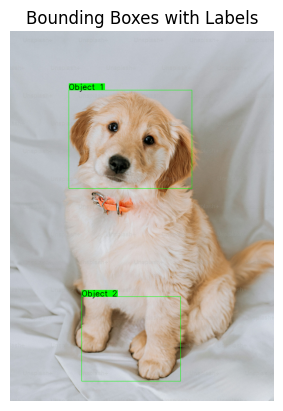

In [ ]:
plt.imshow(img_rgb)
plt.title("Bounding Boxes with Labels")
plt.axis('off')
plt.show()

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]], dtype=uint8)
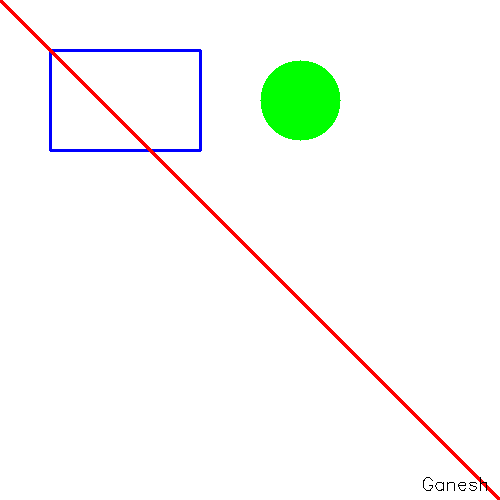

In [ ]:
img_blank = np.ones((500, 500, 3), dtype=np.uint8) * 255
cv2.rectangle(img_blank, (50, 50), (200, 150), (0, 0, 255), thickness=2)
cv2.circle(img_blank, (300, 100), 40, (0, 255, 0), thickness=-1)
cv2.line(img_blank, (0, 0), (499, 499), (255, 0, 0), thickness=2)
watermark = "Ganesh"
text_size = cv2.getTextSize(watermark, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)[0]
text_x = img_blank.shape[1] - text_size[0] - 10
text_y = img_blank.shape[0] - 10
cv2.putText(img_blank, watermark, (text_x, text_y),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.6,
            color=(0, 0, 0), thickness=1)

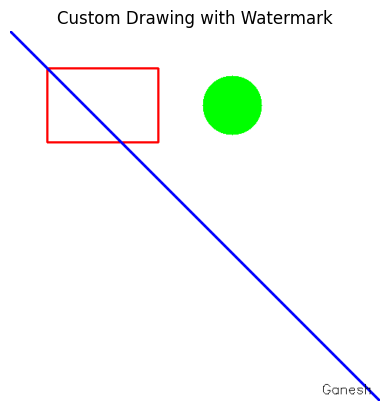

In [ ]:
cv2.imwrite("custom_drawing.png", img_blank)
plt.imshow(cv2.cvtColor(img_blank, cv2.COLOR_BGR2RGB))
plt.title("Custom Drawing with Watermark")
plt.axis('off')
plt.show()

# **Problem 5**

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)

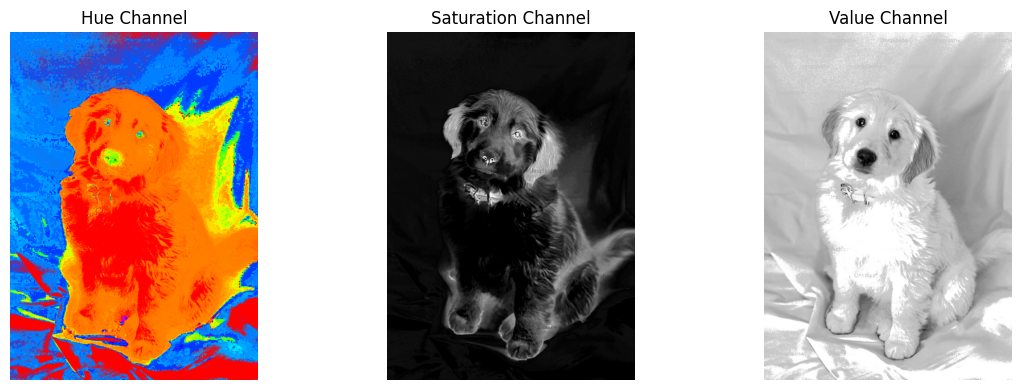

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Hue Channel")
plt.imshow(h, cmap='hsv')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Saturation Channel")
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Value Channel")
plt.imshow(v, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_reconverted = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
reconverted_rgb = cv2.cvtColor(img_reconverted, cv2.COLOR_BGR2RGB)
hsv_vis = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

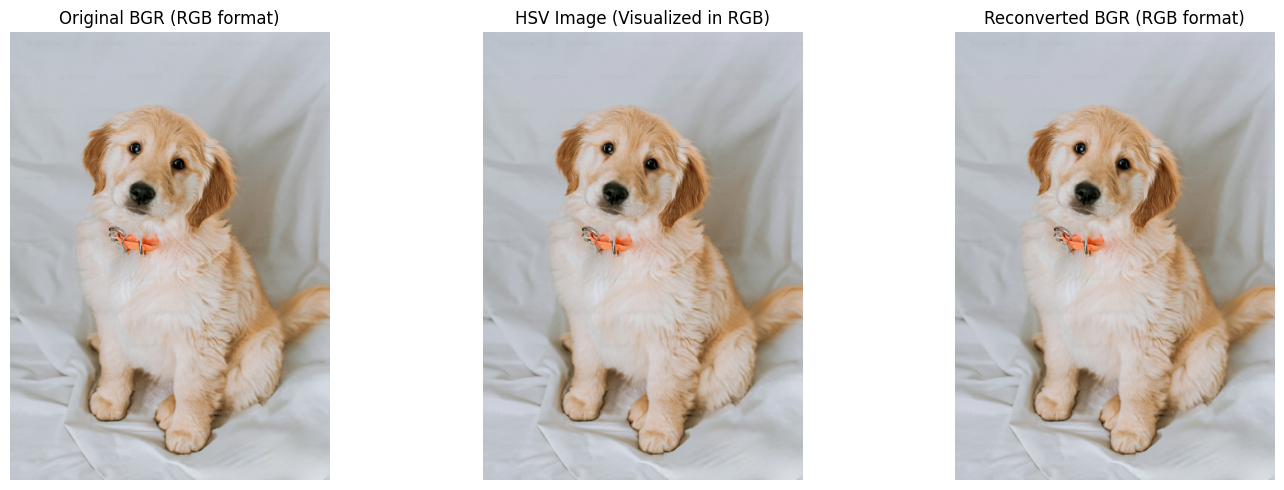

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original BGR (RGB format)")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("HSV Image (Visualized in RGB)")
plt.imshow(hsv_vis)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Reconverted BGR (RGB format)")
plt.imshow(reconverted_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()